In [1]:
from PolynomialRegressionModel import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Model for US

In [2]:
df = pd.read_csv('../Data/Confirmed_VS_Vaccinated_US.csv').drop(columns=['Unnamed: 0'])
df

,ObservationDate,Confirmed,People_Fully_Vaccinated
0,2020-12-20,17954675.0,0.0
1,2020-12-21,18153724.0,0.0
2,2020-12-22,18351735.0,0.0
3,2020-12-23,18581353.0,0.0
4,2020-12-24,18775557.0,0.0
...,...,...,...
129,2021-04-28,32230850.0,199426393.0
130,2021-04-29,32289049.0,202713598.0
131,2021-04-30,32346971.0,206220484.0
132,2021-05-01,32392274.0,210278776.0


In [3]:
## Use the data from April to May as test
df[df['ObservationDate']=='2021-04-01'].index

Int64Index([102], dtype='int64')

In [4]:
x = np.array(df.iloc[:102,:].index.values.tolist()).reshape(-1, 1)
x

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [5]:

list = []
for i in range(0,32):
    list.append(102 +i)
x_pred = np.array(list).reshape(-1, 1)
x_pred

array([[102],
       [103],
       [104],
       [105],
       [106],
       [107],
       [108],
       [109],
       [110],
       [111],
       [112],
       [113],
       [114],
       [115],
       [116],
       [117],
       [118],
       [119],
       [120],
       [121],
       [122],
       [123],
       [124],
       [125],
       [126],
       [127],
       [128],
       [129],
       [130],
       [131],
       [132],
       [133]])

In [6]:
y_v_train = df.iloc[:102,-1]
y_v_train

0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
          ...     
97     102491174.0
98     105451667.0
99     107528783.0
100    109153459.0
101    111562791.0
Name: People_Fully_Vaccinated, Length: 102, dtype: float64

In [7]:
model_v = PolynomialRegressionModel(polynomial_degree=2)
model_v.train(x,y_v_train)

In [8]:
y_v_pred = model_v.get_predictions(x_pred)
y_v_pred

array([117010136, 119649258, 122317535, 125014966, 127741553, 130497294,
       133282190, 136096241, 138939447, 141811808, 144713323, 147643993,
       150603818, 153592798, 156610933, 159658222, 162734667, 165840266,
       168975020, 172138929, 175331992, 178554211, 181805584, 185086112,
       188395795, 191734632, 195102625, 198499772, 201926074, 205381531,
       208866143, 212379910])

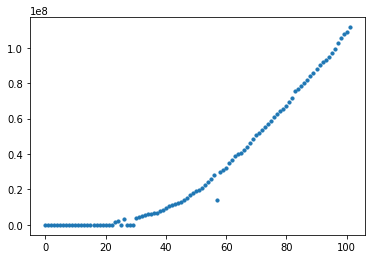

In [9]:
plt.scatter(x, y_v_train, s=10)

In [10]:
y_v_test = df.iloc[102:,-1]
y_v_test

102    114583082.0
103    118422715.0
104    122216549.0
105    125385077.0
106    127355746.0
107    128602626.0
108    131454029.0
109    135064895.0
110    139105415.0
111    144145651.0
112    148071014.0
113    150979224.0
114    153501691.0
115    156266663.0
116    159943303.0
117    164207620.0
118    167974595.0
119    171603046.0
120    173830334.0
121    175551679.0
122    178322476.0
123    181665228.0
124    185563352.0
125    189409819.0
126    192837765.0
127    195081051.0
128    196802025.0
129    199426393.0
130    202713598.0
131    206220484.0
132    210278776.0
133    213016060.0
Name: People_Fully_Vaccinated, dtype: float64

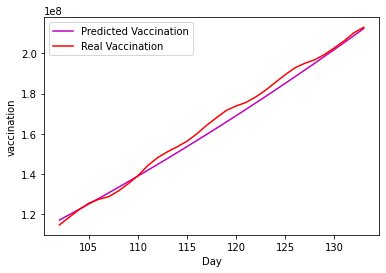

In [27]:
plt.plot(x_pred, y_v_pred, color='m', label="Predicted Vaccination")
plt.plot(x_pred, y_v_test, color='r',label="Real Vaccination")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("vaccination")
plt.show()

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_v_test,y_v_pred)

0.0

### Train model with features of days and vaccinations 

In [12]:
y_c_train = df.iloc[:102,1]
vaccination = df.iloc[:102,-1]
vaccination

0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
          ...     
97     102491174.0
98     105451667.0
99     107528783.0
100    109153459.0
101    111562791.0
Name: People_Fully_Vaccinated, Length: 102, dtype: float64

In [13]:
x_c_train = np.vstack((np.array(df.iloc[:102,:].index.values.tolist()), vaccination)).T
#x_c_train

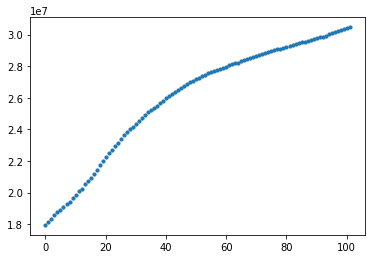

In [14]:
plt.scatter(x,y_c_train,s=10)

In [15]:
model_c = PolynomialRegressionModel(polynomial_degree=1)
model_c.train(x_c_train,y_c_train)

In [16]:
x_c_test = np.vstack((np.array(list), y_v_pred)).T
x_c_test

array([[      102, 117010136],
       [      103, 119649258],
       [      104, 122317535],
       [      105, 125014966],
       [      106, 127741553],
       [      107, 130497294],
       [      108, 133282190],
       [      109, 136096241],
       [      110, 138939447],
       [      111, 141811808],
       [      112, 144713323],
       [      113, 147643993],
       [      114, 150603818],
       [      115, 153592798],
       [      116, 156610933],
       [      117, 159658222],
       [      118, 162734667],
       [      119, 165840266],
       [      120, 168975020],
       [      121, 172138929],
       [      122, 175331992],
       [      123, 178554211],
       [      124, 181805584],
       [      125, 185086112],
       [      126, 188395795],
       [      127, 191734632],
       [      128, 195102625],
       [      129, 198499772],
       [      130, 201926074],
       [      131, 205381531],
       [      132, 208866143],
       [      133, 212379910]])

In [17]:
y_c_pred = model_c.get_predictions(x_c_test)
y_c_pred

array([29873008, 29860923, 29846309, 29829165, 29809491, 29787287,
       29762554, 29735291, 29705499, 29673176, 29638325, 29600943,
       29561031, 29518590, 29473620, 29426119, 29376089, 29323529,
       29268440, 29210820, 29150672, 29087993, 29022785, 28955047,
       28884779, 28811982, 28736654, 28658798, 28578411, 28495495,
       28410049, 28322074])

#### Using real vaccination for prediction

In [18]:
x_c_test_real = np.vstack((np.array(list), np.array(y_v_test.tolist()))).T
x_c_test_real

array([[1.02000000e+02, 1.14583082e+08],
       [1.03000000e+02, 1.18422715e+08],
       [1.04000000e+02, 1.22216549e+08],
       [1.05000000e+02, 1.25385077e+08],
       [1.06000000e+02, 1.27355746e+08],
       [1.07000000e+02, 1.28602626e+08],
       [1.08000000e+02, 1.31454029e+08],
       [1.09000000e+02, 1.35064895e+08],
       [1.10000000e+02, 1.39105415e+08],
       [1.11000000e+02, 1.44145651e+08],
       [1.12000000e+02, 1.48071014e+08],
       [1.13000000e+02, 1.50979224e+08],
       [1.14000000e+02, 1.53501691e+08],
       [1.15000000e+02, 1.56266663e+08],
       [1.16000000e+02, 1.59943303e+08],
       [1.17000000e+02, 1.64207620e+08],
       [1.18000000e+02, 1.67974595e+08],
       [1.19000000e+02, 1.71603046e+08],
       [1.20000000e+02, 1.73830334e+08],
       [1.21000000e+02, 1.75551679e+08],
       [1.22000000e+02, 1.78322476e+08],
       [1.23000000e+02, 1.81665228e+08],
       [1.24000000e+02, 1.85563352e+08],
       [1.25000000e+02, 1.89409819e+08],
       [1.260000

In [19]:
y_c_pred_real = model_c.get_predictions(x_c_test_real)
y_c_pred_real

array([30083598, 29967347, 29855071, 29797051, 29842966, 29951683,
       29921179, 29824779, 29691098, 29470674, 29346986, 29311553,
       29309590, 29286586, 29184478, 29031379, 28921433, 28823507,
       28847156, 28914704, 28891194, 28818057, 28696732, 28579889,
       28499360, 28521621, 28589202, 28578397, 28510080, 28422701,
       28287478, 28266876])

In [20]:
y_c_test = df.iloc[102:,1]
y_c_test

102    30541255.0
103    30611086.0
104    30674153.0
105    30709125.0
106    30786804.0
107    30847348.0
108    30922386.0
109    31002264.0
110    31084962.0
111    31151497.0
112    31197877.0
113    31268107.0
114    31345985.0
115    31421360.0
116    31495649.0
117    31575640.0
118    31628013.0
119    31670031.0
120    31737964.0
121    31799237.0
122    31862094.0
123    31929351.0
124    31991750.0
125    32045113.0
126    32077178.0
127    32124869.0
128    32175725.0
129    32230850.0
130    32289049.0
131    32346971.0
132    32392274.0
133    32421534.0
Name: Confirmed, dtype: float64

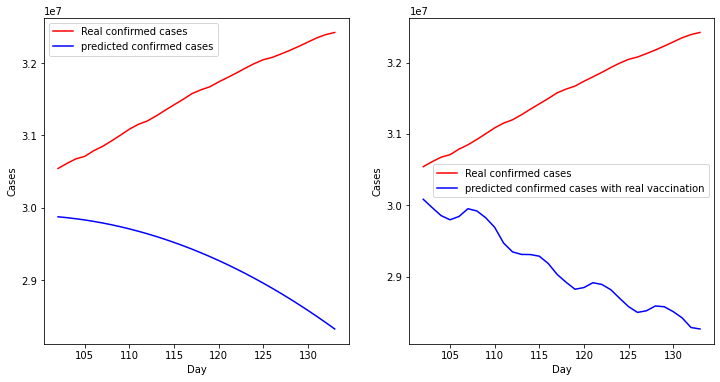

In [21]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(x_pred, y_c_test, color='r', label="Real confirmed cases")
plt.plot(x_pred,y_c_pred,color='b', label="predicted confirmed cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases")

plt.subplot(1,2,2)
plt.plot(x_pred, y_c_test, color='r', label="Real confirmed cases")
plt.plot(x_pred,y_c_pred_real,color='b', label="predicted confirmed cases with real vaccination")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases")

plt.show()

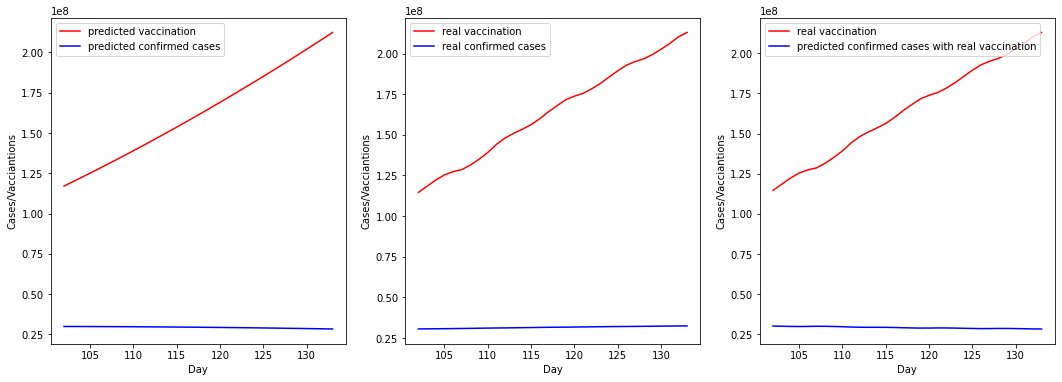

In [22]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(x_pred, y_v_pred, color='r', label="predicted vaccination")
plt.plot(x_pred,y_c_pred,color='b', label="predicted confirmed cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases/Vacciantions")

plt.subplot(1,3,2)
plt.plot(x_pred, y_v_test, color='r', label="real vaccination")
plt.plot(x_pred,y_c_test,color='b', label="real confirmed cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases/Vacciantions")

plt.subplot(1,3,3)
plt.plot(x_pred, y_v_test, color='r', label="real vaccination")
plt.plot(x_pred,y_c_pred_real,color='b', label="predicted confirmed cases with real vaccination")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases/Vacciantions")

plt.show()